<a href="https://colab.research.google.com/github/IA2021UR/entregable-1-joferne/blob/main/2_visualizacion_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. IMPORTACIÓN DE LIBRERÍAS** 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
%config InlineBackend.figure_format = 'svg'

**2. CARGA DE DATOS** 

In [2]:
!unzip ia2021.zip

Archive:  ia2021.zip
  inflating: test.csv                
  inflating: train.csv               


In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

**3. VISUALIZACIÓN DE DATOS** 

In [4]:
df_train.head()

,SL,EEG,BP,HR,CIRCULATION,ACTIVITY
0,4019.64,-1600.00,13,79,317,3
1,2191.03,-1146.08,20,54,165,2
2,2787.99,-1263.38,46,67,224,2
3,9545.98,-2848.93,26,138,554,4
4,14148.80,-2381.15,85,120,809,4


Observamos el histograma de cada una de las variables.

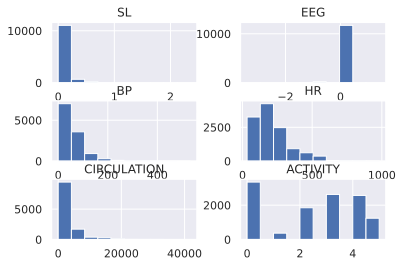

In [5]:
features = ['SL', 'EEG', 'BP', 'HR', 'CIRCULATION', 'ACTIVITY']
df_train[features].hist();

Observamos la distribución de las variables.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


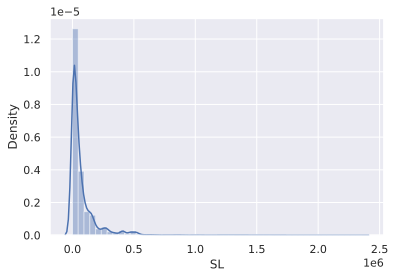

In [6]:
sns.distplot(df_train['SL'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


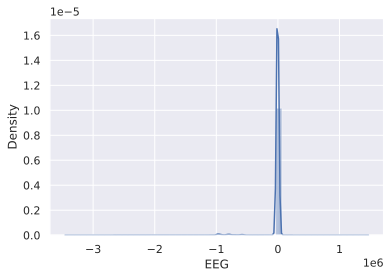

In [7]:
sns.distplot(df_train['EEG'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


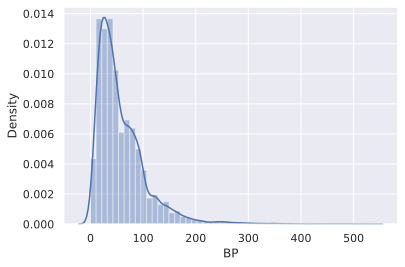

In [8]:
sns.distplot(df_train['BP'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


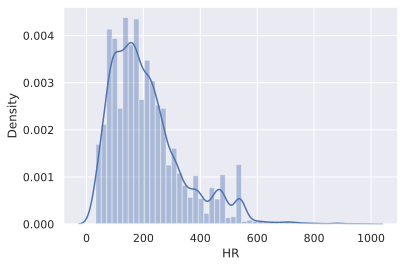

In [9]:
sns.distplot(df_train['HR'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


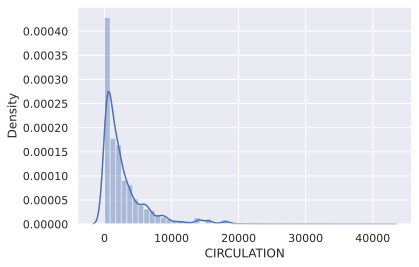

In [10]:
sns.distplot(df_train['CIRCULATION'])

Aparentemente ninguna presenta una distribución normal, por ello a la hora de crear el modelo sería interesante estandarizar los datos. También como cada uno está en su respectiva escala sería interesante normalizarlos.

Observemos los diagramas de cajas.

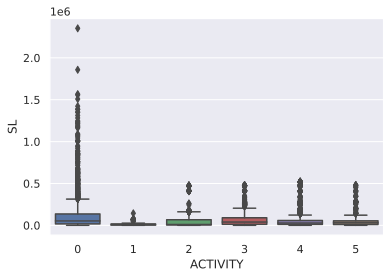

In [11]:
sns.boxplot(x='ACTIVITY', y='SL', data=df_train);

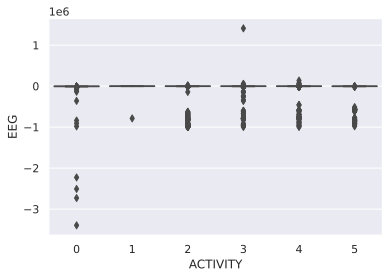

In [12]:
sns.boxplot(x='ACTIVITY', y='EEG', data=df_train);

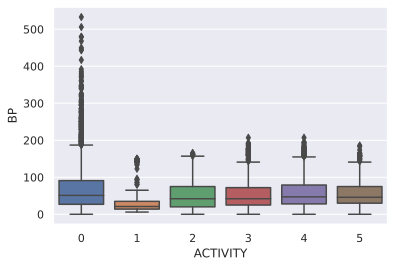

In [13]:
sns.boxplot(x='ACTIVITY', y='BP', data=df_train);

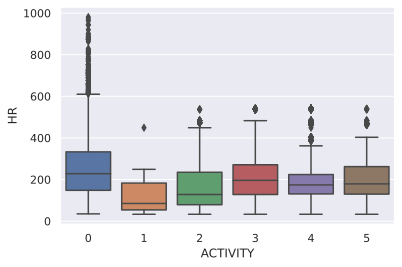

In [14]:
sns.boxplot(x='ACTIVITY', y='HR', data=df_train);

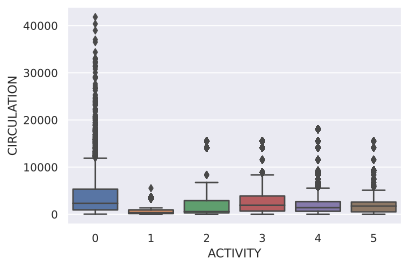

In [15]:
sns.boxplot(x='ACTIVITY', y='CIRCULATION', data=df_train);

Hay que destacar la presencia de ouliers, no solo por la cantidad sino por la gran desviación.

In [18]:
df_train.apply(np.std)

SL             126663.882980
EEG            128471.185992
BP                 48.144239
HR                130.369595
CIRCULATION      3789.664197
ACTIVITY            1.736536
dtype: float64

In [19]:
df_test.apply(np.std)

SL             129956.316341
EEG            228865.163555
BP                 48.686496
HR                128.746881
CIRCULATION      3923.011297
dtype: float64

Una cuestión importante es que la desviación del conjunto de test es mayor aún que la del conjunto de entrenamiento. Más adelante veremos que eliminando outliers mejorará considerablemente la precisión en el conjunto de entrenamiento, pero a la hora de clasificar el de test no identificará correctamente el ruido.

Observamos el diagrama de dispersión variable a variable (multivariante).

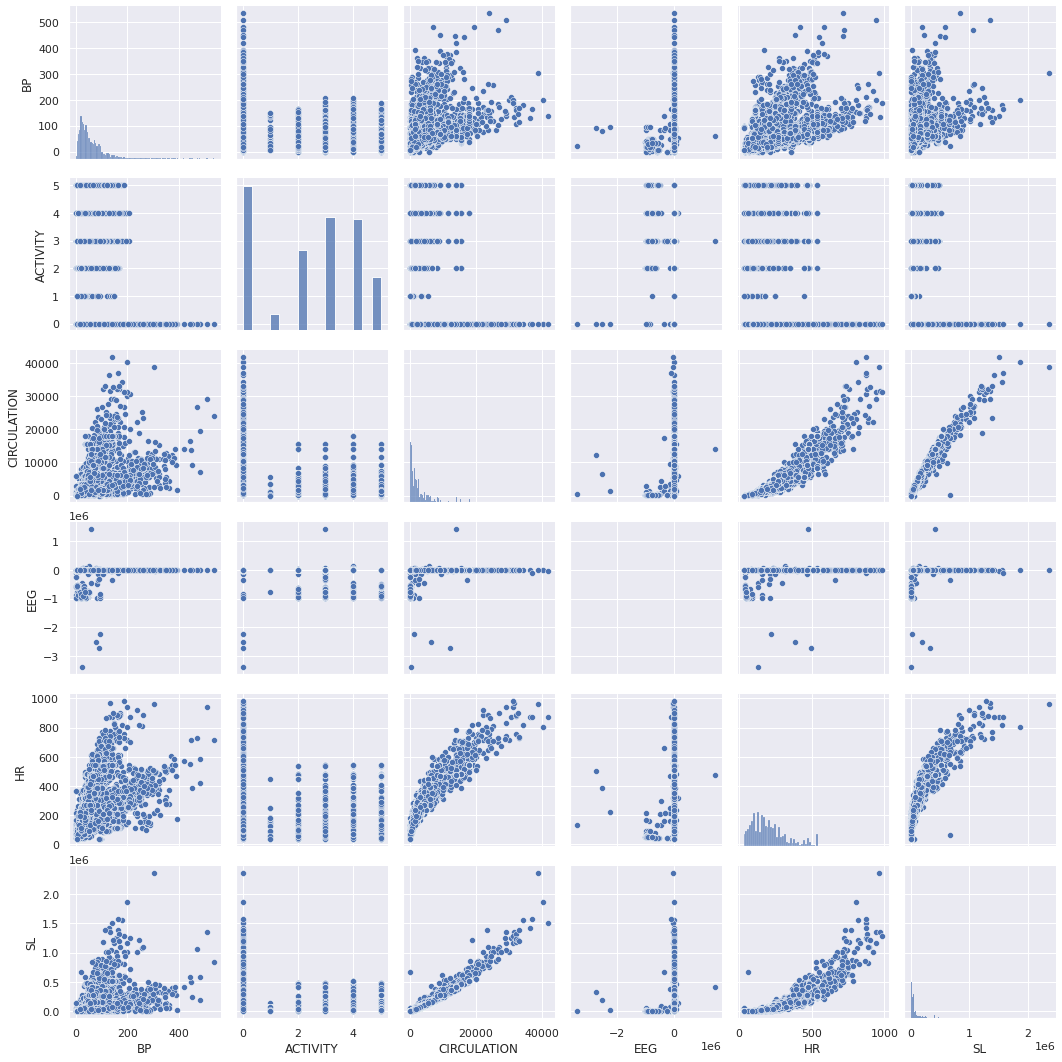

In [16]:
elem = list(set(features))
%config InlineBackend.figure_format = 'png'
sns.pairplot(df_train[elem]);

Veamos la matriz de correlación.

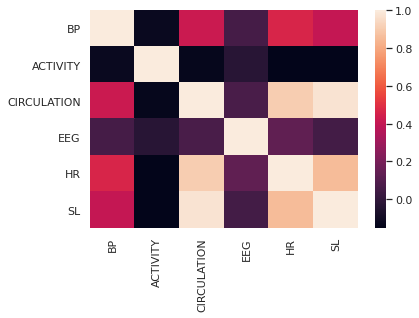

In [17]:
corr_matrix = df_train[elem].corr()
sns.heatmap(corr_matrix);

Apenas hay correlación entre las variables, solo entre 'SL' y 'CIRCULATION'. De hecho podemos descartar utilizar la regresión lineal múltiple para nuestro modelo ya que la variable 'ACTIVITY' presenta una correlación nula con el resto de variables.